In [20]:
class SGD:
    def __init__(self, lr=0.01): #lrは学習係数
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

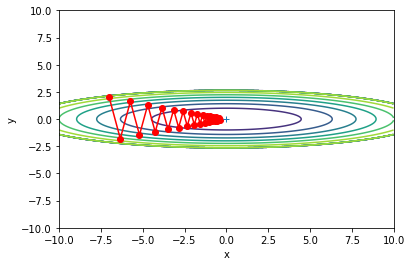

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizer = SGD(lr=0.95)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]
  
for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])
        
    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)
    

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
    
X, Y = np.meshgrid(x, y) 
Z = f(X, Y)
    
# for simple contour line  
mask = Z > 7
Z[mask] = 0
    
# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [22]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [23]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [24]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

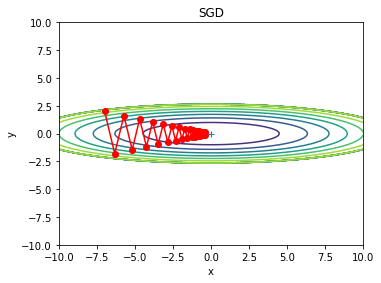

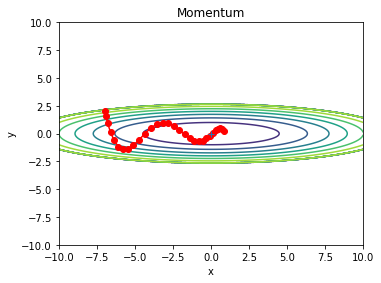

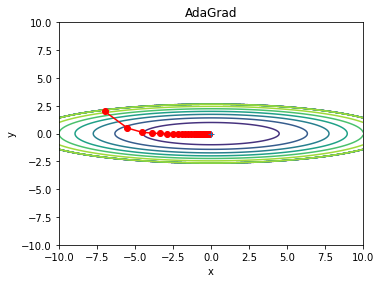

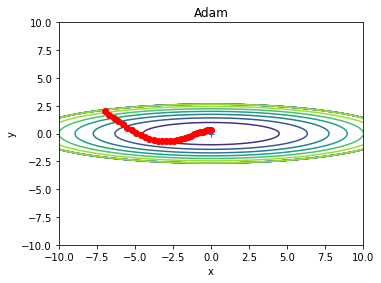

In [25]:
from collections import OrderedDict

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.figure(figsize=(12,9))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.270341703614685
Momentum:2.405519963025819
AdaGrad:2.0468042885055224
Adam:2.1989903776011013
===========iteration:100===========
SGD:1.3484593030970105
Momentum:0.3154429161488026
AdaGrad:0.14161301096829682
Adam:0.23302042013508853
===========iteration:200===========
SGD:0.7845816642893392
Momentum:0.2681840301329
AdaGrad:0.17915989344319008
Adam:0.1749963783709127
===========iteration:300===========
SGD:0.4604617342465499
Momentum:0.14707883179106723
AdaGrad:0.09786419007166877
Adam:0.12476988487469555
===========iteration:400===========
SGD:0.3530611507457019
Momentum:0.13117026647800553
AdaGrad:0.03698367556511124
Adam:0.08237096400501347
===========iteration:500===========
SGD:0.47723700036129857
Momentum:0.31355193177916996
AdaGrad:0.10829110292053831
Adam:0.23740672690531067
===========iteration:600===========
SGD:0.365094925547134
Momentum:0.17984992132015964
AdaGrad:0.09946802223803887
Adam:0.1222208433174249
===========iteration:700===

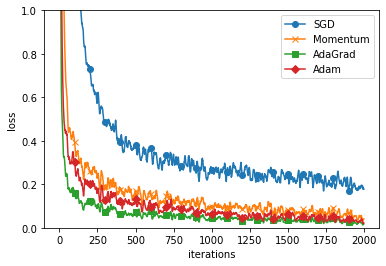

In [26]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

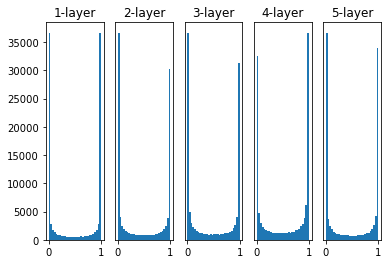

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)

    z = sigmoid(a)
    
    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():

    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

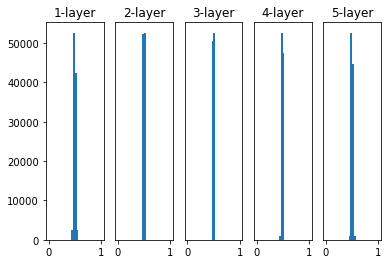

In [28]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)

    z = sigmoid(a)
    
    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

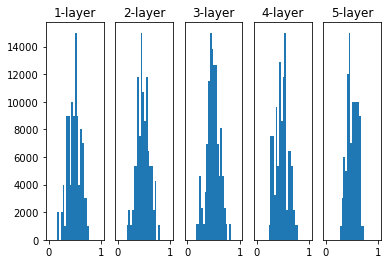

In [29]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    a = np.dot(x, w)

    z = sigmoid(a)
    
    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.302485840070073
Xavier:2.284568492535545
He:2.3852214589403893
===========iteration:100===========
std=0.01:2.302680413834837
Xavier:2.196377656665815
He:1.586974997778825
===========iteration:200===========
std=0.01:2.301742783730832
Xavier:1.9401749558449046
He:0.8033465907132158
===========iteration:300===========
std=0.01:2.3013438452402157
Xavier:1.6854654479210045
He:0.5418943507731534
===========iteration:400===========
std=0.01:2.2997841447680996
Xavier:1.0805361061228296
He:0.4253269509380676
===========iteration:500===========
std=0.01:2.3001875596420156
Xavier:0.7923689826599972
He:0.39149747631480425
===========iteration:600===========
std=0.01:2.3045190082712597
Xavier:0.7723079152179204
He:0.4879081655978693
===========iteration:700===========
std=0.01:2.3001896036220666
Xavier:0.6261173628346354
He:0.30957913683245447
===========iteration:800===========
std=0.01:2.2993622362826116
Xavier:0.4817762361220074
He:0.218197301196975

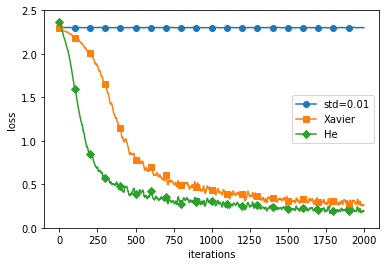

In [30]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)
plt.figure(figsize=(12,9))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

============== 1/16 ==============
epoch:0 | 0.099 - 0.134
epoch:1 | 0.097 - 0.161

C:\Users\apple\Jupyter\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\apple\Jupyter\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)



epoch:2 | 0.097 - 0.141
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.149
epoch:5 | 0.097 - 0.169
epoch:6 | 0.097 - 0.177
epoch:7 | 0.097 - 0.197
epoch:8 | 0.097 - 0.217
epoch:9 | 0.097 - 0.236
epoch:10 | 0.097 - 0.26
epoch:11 | 0.097 - 0.28
epoch:12 | 0.097 - 0.291
epoch:13 | 0.097 - 0.31
epoch:14 | 0.097 - 0.34
epoch:15 | 0.097 - 0.353
epoch:16 | 0.097 - 0.374
epoch:17 | 0.097 - 0.398
epoch:18 | 0.097 - 0.398


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.406
============== 2/16 ==============
epoch:0 | 0.097 - 0.096
epoch:1 | 0.097 - 0.11


C:\Users\apple\Jupyter\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\apple\Jupyter\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.103
epoch:3 | 0.097 - 0.137
epoch:4 | 0.097 - 0.166
epoch:5 | 0.097 - 0.199
epoch:6 | 0.097 - 0.222
epoch:7 | 0.097 - 0.24
epoch:8 | 0.097 - 0.275
epoch:9 | 0.097 - 0.291
epoch:10 | 0.097 - 0.325
epoch:11 | 0.097 - 0.354
epoch:12 | 0.097 - 0.376
epoch:13 | 0.097 - 0.395
epoch:14 | 0.097 - 0.418
epoch:15 | 0.097 - 0.428
epoch:16 | 0.097 - 0.446
epoch:17 | 0.097 - 0.475


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.478
epoch:19 | 0.097 - 0.497
============== 3/16 ==============
epoch:0 | 0.117 - 0.115
epoch:1 | 0.372 - 0.138
epoch:2 | 0.527 - 0.176
epoch:3 | 0.612 - 0.203
epoch:4 | 0.699 - 0.237
epoch:5 | 0.762 - 0.263
epoch:6 | 0.805 - 0.304
epoch:7 | 0.824 - 0.328
epoch:8 | 0.867 - 0.363
epoch:9 | 0.885 - 0.384
epoch:10 | 0.926 - 0.405
epoch:11 | 0.932 - 0.427
epoch:12 | 0.946 - 0.457
epoch:13 | 0.957 - 0.475
epoch:14 | 0.971 - 0.502
epoch:15 | 0.971 - 0.516
epoch:16 | 0.975 - 0.538
epoch:17 | 0.982 - 0.556
epoch:18 | 0.989 - 0.583


No handles with labels found to put in legend.


epoch:19 | 0.993 - 0.593
============== 4/16 ==============
epoch:0 | 0.112 - 0.115
epoch:1 | 0.26 - 0.138
epoch:2 | 0.395 - 0.186
epoch:3 | 0.519 - 0.26
epoch:4 | 0.6 - 0.339
epoch:5 | 0.651 - 0.404
epoch:6 | 0.688 - 0.455
epoch:7 | 0.721 - 0.503
epoch:8 | 0.732 - 0.551
epoch:9 | 0.768 - 0.583
epoch:10 | 0.782 - 0.609
epoch:11 | 0.799 - 0.642
epoch:12 | 0.811 - 0.674
epoch:13 | 0.82 - 0.695
epoch:14 | 0.822 - 0.712
epoch:15 | 0.842 - 0.737
epoch:16 | 0.855 - 0.753
epoch:17 | 0.862 - 0.758
epoch:18 | 0.871 - 0.779


No handles with labels found to put in legend.


epoch:19 | 0.873 - 0.79
============== 5/16 ==============
epoch:0 | 0.128 - 0.108
epoch:1 | 0.139 - 0.147
epoch:2 | 0.143 - 0.263
epoch:3 | 0.146 - 0.411
epoch:4 | 0.158 - 0.513
epoch:5 | 0.161 - 0.59
epoch:6 | 0.172 - 0.646
epoch:7 | 0.178 - 0.694
epoch:8 | 0.186 - 0.73
epoch:9 | 0.197 - 0.745
epoch:10 | 0.198 - 0.767
epoch:11 | 0.197 - 0.789
epoch:12 | 0.213 - 0.81
epoch:13 | 0.217 - 0.828
epoch:14 | 0.216 - 0.832
epoch:15 | 0.207 - 0.853
epoch:16 | 0.205 - 0.858
epoch:17 | 0.205 - 0.867
epoch:18 | 0.208 - 0.875


No handles with labels found to put in legend.


epoch:19 | 0.212 - 0.886
============== 6/16 ==============
epoch:0 | 0.091 - 0.124
epoch:1 | 0.118 - 0.202
epoch:2 | 0.117 - 0.382
epoch:3 | 0.117 - 0.546
epoch:4 | 0.117 - 0.652
epoch:5 | 0.117 - 0.712
epoch:6 | 0.117 - 0.766
epoch:7 | 0.117 - 0.788
epoch:8 | 0.117 - 0.819
epoch:9 | 0.117 - 0.844
epoch:10 | 0.117 - 0.865
epoch:11 | 0.117 - 0.872
epoch:12 | 0.117 - 0.884
epoch:13 | 0.117 - 0.893
epoch:14 | 0.117 - 0.907
epoch:15 | 0.127 - 0.913
epoch:16 | 0.169 - 0.924
epoch:17 | 0.167 - 0.934
epoch:18 | 0.117 - 0.944


No handles with labels found to put in legend.


epoch:19 | 0.123 - 0.95
============== 7/16 ==============
epoch:0 | 0.094 - 0.107
epoch:1 | 0.105 - 0.227
epoch:2 | 0.105 - 0.599
epoch:3 | 0.105 - 0.72
epoch:4 | 0.116 - 0.75
epoch:5 | 0.117 - 0.787
epoch:6 | 0.117 - 0.806
epoch:7 | 0.117 - 0.819
epoch:8 | 0.117 - 0.845
epoch:9 | 0.116 - 0.869
epoch:10 | 0.116 - 0.892
epoch:11 | 0.117 - 0.918
epoch:12 | 0.117 - 0.941
epoch:13 | 0.116 - 0.95
epoch:14 | 0.116 - 0.965
epoch:15 | 0.117 - 0.968
epoch:16 | 0.117 - 0.971
epoch:17 | 0.117 - 0.977
epoch:18 | 0.117 - 0.977


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.984
============== 8/16 ==============
epoch:0 | 0.093 - 0.12
epoch:1 | 0.116 - 0.236
epoch:2 | 0.116 - 0.632
epoch:3 | 0.116 - 0.724
epoch:4 | 0.116 - 0.769
epoch:5 | 0.116 - 0.798
epoch:6 | 0.116 - 0.859
epoch:7 | 0.116 - 0.919
epoch:8 | 0.116 - 0.938
epoch:9 | 0.116 - 0.966
epoch:10 | 0.116 - 0.978
epoch:11 | 0.116 - 0.984
epoch:12 | 0.116 - 0.989
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.996


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.998
============== 9/16 ==============
epoch:0 | 0.1 - 0.113
epoch:1 | 0.116 - 0.578


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()